In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

- Age has 20% data missing
- Cabin has 77% data missing
- Embarked contains 0.2% data missing

## Exploratory data analysis  (EDA)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


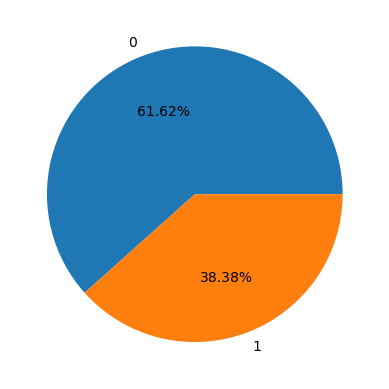

In [8]:
import matplotlib.pyplot as plt
plt.pie(labels= df.Survived.value_counts().index, x = df.Survived.value_counts().values, autopct='%.2f%%')
plt.show()

In [9]:
#show doc using shift+tab
%config IPCompleter.greedy=True

The pie chart shows:
- 61% data on 0 class and 
- 38% data on 1 class
which means data is imbalanced.

>If data is imbalanced weuse Oversampling or Undersampling technique to balance the data.<br>
For imbalance data we cannot use accuracy as evaluation metric.


## Does Pclass affect Survived?

In [10]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='count'>

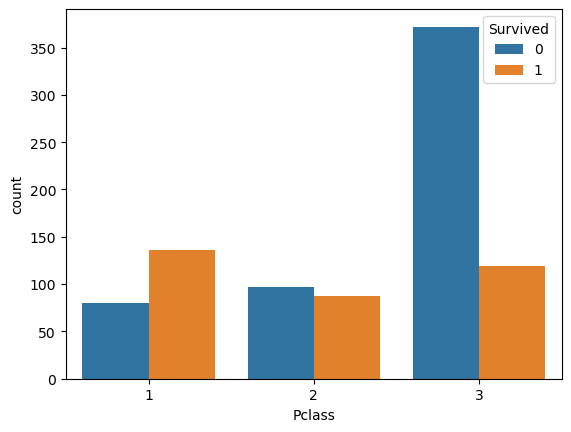

In [11]:
sns.countplot(x='Pclass', hue ='Survived', data=df)

>Most people survived in pclass 1<br>
most people died in pclass 3<br>
pclass affects Survived

<Axes: xlabel='Sex', ylabel='count'>

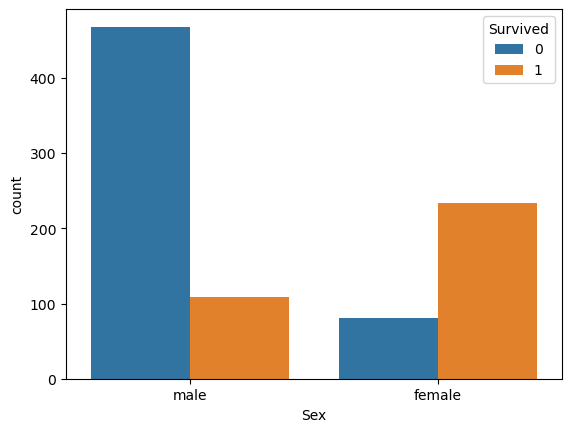

In [12]:
sns.countplot(x='Sex', hue ='Survived', data=df)

> - Most of the men died <br>
> - Most of Female survived<br>
> - It means sex affects survived

<Axes: xlabel='Pclass', ylabel='Age'>

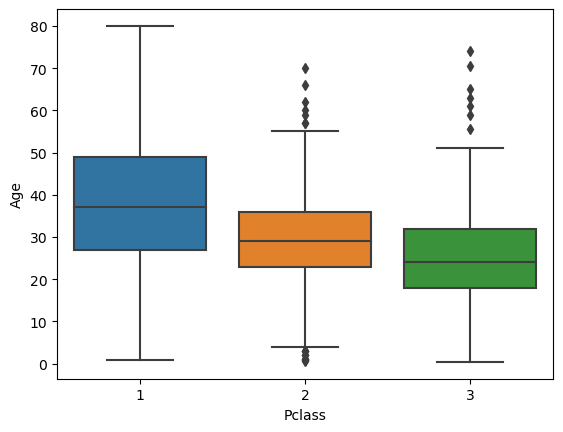

In [13]:
sns.boxplot(x='Pclass', y='Age', data= df)

In [14]:
df.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [15]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isna(age) and pclass == 1:
        return 37
    elif pd.isna(age) and pclass ==2:
        return 29
    elif pd.isna(age) and pclass == 3:
        return 24
    else: return age

In [16]:
df.Age = df[['Age','Pclass']].apply(fill_age, axis='columns')

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Drop Cabin column
del df['Cabin']

In [19]:
df.dropna(inplace = True)

In [20]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


PassengerId, Name , Ticket makes no contribution to survived column. <br>
It is an irrelevant feature. <br>
We drop such column.

In [22]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace = True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
X = df.iloc[:, 1:]
y = df.Survived

In [25]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [26]:
X_encoded = pd.get_dummies(columns=['Sex', 'Embarked'], data = X, drop_first= True)
#changes the embarked into 3 columns of s,c and q , 
# drops first column c because we can predict c with s and q.

In [27]:
X_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_encoded, y ,test_size =0.2, random_state=40)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [30]:
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report,
                             precision_score,
                             recall_score,
                             f1_score)

In [31]:
confusion_matrix(y_test, y_pred)

array([[92, 18],
       [17, 51]])

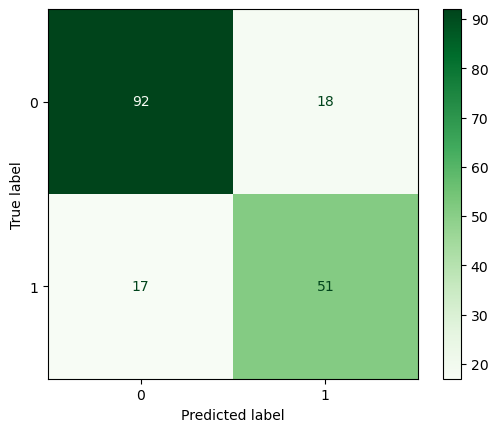

In [32]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens')

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [34]:

precision_score(y_test, y_pred)

0.7391304347826086

In [35]:
recall_score(y_test, y_pred)

0.75

In [36]:
#harmonic mean of precision and recall.
f1_score(y_test, y_pred)

0.7445255474452556